In [1]:
from hypergraph import *

# Graf
Hipergrafy są reprezentowane przez instancje klasy `Graph`. Składa się ona z węzłów (klasa `Node`), które odpowiadają wierzchołkom oraz hiperkrawędziom. Każdy węzeł ma poniższe właściwości:
- `pos` - Pozycja
- `label` - Etykieta
- `attrs` - Słownik zawierający atrybuty
- `is_hyperedge` - `True` jeżeli węzeł jest hiperkrawędzią, `False` w przeciwnym przypadku

W grafie każdy węzeł posiada unikalny identyfikator liczbowy oraz listę węzłów, z którymi jest połączony.

Przy tworzeniu grafu przydatne są poniższe funkcje:

`vertex(pos: tuple[int, int], label: str = "", neighbours: Optional[list[int]] = None, attrs: Optional[dict[str, str]] = None
)`
`hyperedge(pos: tuple[int, int], label: str, neighbours: list[int], attrs: Optional[dict[str, str]] = None)`

Poniżej podany jest przykład prostego grafu.

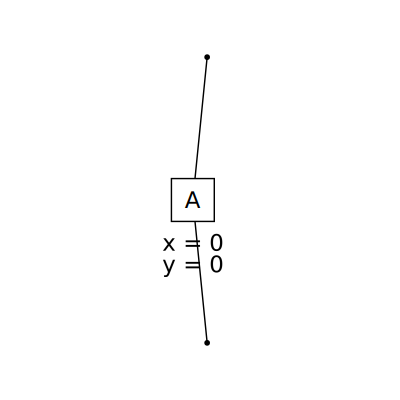

In [7]:
starting_graph = Graph({
  0: vertex((0, -1)),
  1: vertex((0,  1)),
  2: hyperedge((-0.1, 0), "A", [0, 1], attrs = { "x": 0, "y": 0 })
})
display(starting_graph)

Podawanie sąsiadów jest wymagane jedynie w przypadku hiperkrawędzi.

# Produkcje
Produkcje są reprezentowane przez instancje klasy `Production`. Zawiera ona grafy lewej oraz prawej strony.

Węzły z równymi identyfikatorami po lewej i po prawej stronie produkcji zachowują atrybuty oraz poprzednio istniejące połączenia z resztą grafu po zastosowaniu reguły.

__Uwaga__, w przeciwieństwie do klasycznej definicji gramatyk hipergrafowych, gdzie transformacja ta dotyczy tylko wierzchołków zewnętrznych w tej bibliotece działa to również dla hiperkrawędzi.

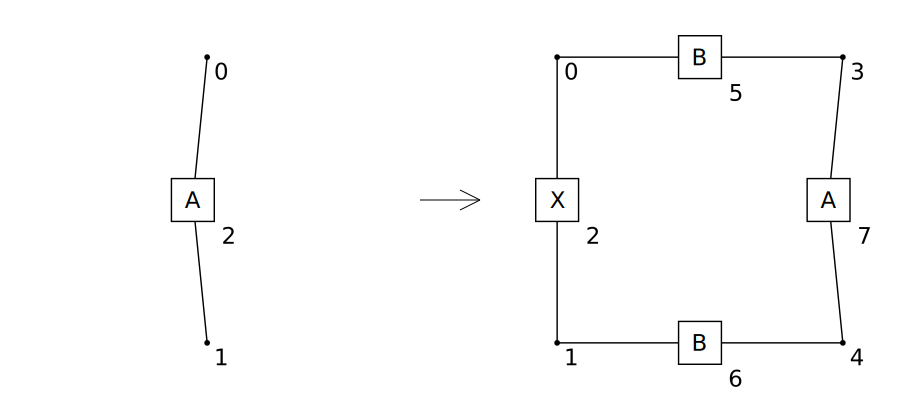

In [9]:
prod = Production(
    left = Graph({
        0: vertex((0, -1)),
        1: vertex((0,  1)),
        2: hyperedge((-0.1, 0), "A", [0, 1])
    }),
    right = Graph({
        0: vertex((0, -1)),
        1: vertex((0,  1)),
        2: hyperedge((0, 0), "X", [0, 1]),
        3: vertex((2, -1)),
        4: vertex((2,  1)),
        5: hyperedge((1, -1), "B", [0, 3]),
        6: hyperedge((1,  1), "B", [1, 4]),
        7: hyperedge((1.9,  0), "A", [3, 4]),
    }),
    seed_node = 2
)

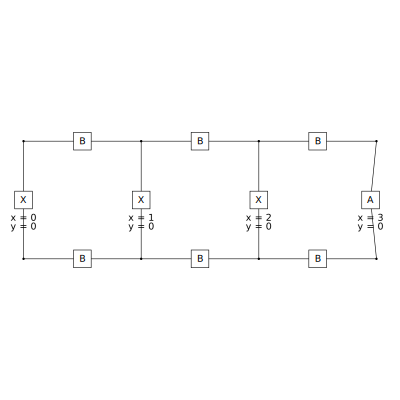

In [5]:
graph = starting_graph
graph = prod.apply_many(graph)

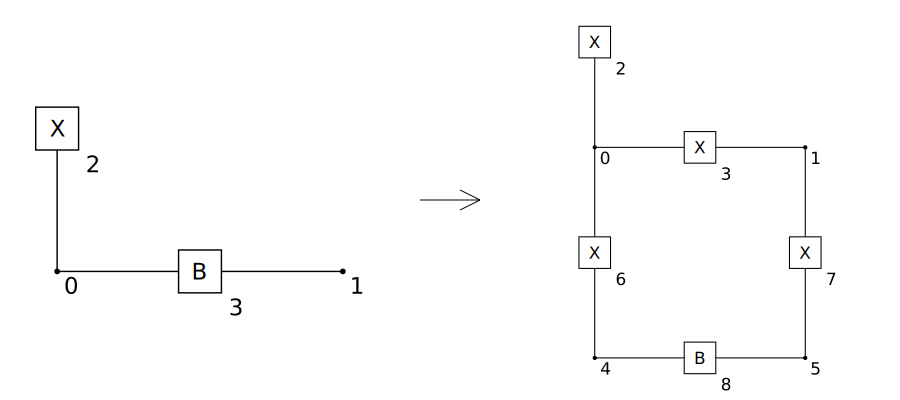

In [6]:
prod2 = Production(
  left = Graph({
    0: vertex((-1, 0)),
    1: vertex((1, 0)),
    2: hyperedge((-1, -1), "X", [0]),
    3: hyperedge((0, 0), "B", [0, 1])
  }), 
  right = Graph({
    0: vertex((-1, 0)),
    1: vertex((1, 0)),
    2: hyperedge((-1, -1), "X", [0]),
    3: hyperedge((0, 0), "X", [0, 1]),
    
    4: vertex((-1, 2)),
    5: vertex((1, 2)),
    6: hyperedge((-1, 1), "X", [0, 4]),
    7: hyperedge((1, 1), "X", [1, 5]),
    8: hyperedge((0, 2), "B", [4, 5])
  }),
  seed_node = 3,
)